# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn
print(sklearn.__version__)

0.24.2


# Loading Data

In [4]:
df = pd.read_csv('Loan Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
print('Missing Values \n', df.isna().sum())

Missing Values 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
df = df.replace({
    'Dependents':'[+]'
},'',regex=True)


In [10]:
df.Dependents.unique()

array(['0', '1', '2', '3', nan], dtype=object)

# Data Engineering


1.   Seperate the features from the label
2.   Handling missing values
3.   Handle the Categorical and Numeric data sepearately
3.   Normalisation of data, Encode the data, data transformation



In [11]:
df = df.drop(['Loan_ID', 'Gender', 'Married'], axis = 1)
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(X.head())
print(y.head())

  Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  \
0          0      Graduate            No             5849                0.0   
1          1      Graduate            No             4583             1508.0   
2          0      Graduate           Yes             3000                0.0   
3          0  Not Graduate            No             2583             2358.0   
4          0      Graduate            No             6000                0.0   

   LoanAmount  Loan_Amount_Term  Credit_History Property_Area  
0         NaN             360.0             1.0         Urban  
1       128.0             360.0             1.0         Rural  
2        66.0             360.0             1.0         Urban  
3       120.0             360.0             1.0         Urban  
4       141.0             360.0             1.0         Urban  
0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object


In [13]:
X.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [14]:
X.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [15]:
X.shape

(614, 9)

In [16]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y , test_size = 0.30, shuffle = True)

In [17]:
X_train.shape

(429, 9)

# Creating Pipeline for the model

In [18]:
#Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [19]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Dependents', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')


In [20]:
numeric_index = [X.columns.get_loc(col) for col in numeric_cols]
numeric_index

[3, 4, 5, 6, 7]

In [21]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

[0, 1, 2, 8]

###### `class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)`

`steps = list of (name,transform) tuple `

In [22]:
#Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')), #Handline numeric missing value with median
    ('scaler',StandardScaler()) #Normalize the data
] )

categorical_transformer = Pipeline(steps = [
    ('imputeC',SimpleImputer(strategy='most_frequent')), #Handline numeric missing value with median
    ('oneHot',OneHotEncoder(handle_unknown='ignore')) #Normalize the data
] )


`class sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)`

`transformers: List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.`



In [23]:
# #Combine the numeric and categorical transformers
# from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('numeric',numeric_transformer,numeric_index),
                ('categorical',categorical_transformer,categorical_index)]
)

In [24]:
#Create the estimator for training
from sklearn.tree import DecisionTreeClassifier

#Create the model
dtmodel = DecisionTreeClassifier()

In [25]:
# from sklearn.linear_model import LogisticRegression
# estimater = LogisticRegression()

In [26]:
#Assemble the individual blocks to form the main pipeline
testmodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('classifier'  , dtmodel)  #Model
    ]
)

In [27]:
# pipelinemodel = Pipeline(steps=
#                         [
#                             ('prep', preprocessor),
#                             ('est', estimater)
#                         ])

In [28]:
Y_train

56     Y
401    N
67     Y
197    Y
613    N
      ..
52     N
193    Y
28     N
485    Y
194    Y
Name: Loan_Status, Length: 429, dtype: object

In [29]:
X_train = X_train.values


In [30]:
x_test = x_test.values

In [31]:
X_train

array([['0', 'Graduate', 'No', ..., 360.0, 1.0, 'Semiurban'],
       ['0', 'Not Graduate', 'No', ..., 300.0, 1.0, 'Rural'],
       ['1', 'Graduate', 'No', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['0', 'Not Graduate', 'No', ..., 360.0, 1.0, 'Urban'],
       ['1', 'Not Graduate', 'No', ..., 360.0, 1.0, 'Rural'],
       ['0', 'Graduate', 'No', ..., 360.0, 1.0, 'Rural']], dtype=object)

# Train the model

In [32]:
#Training the model using pipeline
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
testmodel.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 8])])),
                ('classifier', DecisionTreeClassifier())])

In [33]:
# set_config(display='diagram')
# #fit data
# pipelinemodel.fit(X_train, Y_train)

# Validation and Evaluation of model

In [34]:
#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [35]:
y_pred = testmodel.predict(x_test)
print(y_pred)

['N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N'
 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N']


In [36]:
pipelinemodel.score(X_train,Y_train)

In [37]:
# pipelinemodel.score(x_test,y_test)

In [38]:
testmodel.score(X_train,Y_train)

1.0

In [39]:
testmodel.score(x_test,y_test)

0.6972972972972973

Report : 
              precision    recall  f1-score   support

           Y       0.68      0.53      0.59        78
           N       0.70      0.82      0.76       107

    accuracy                           0.70       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.70      0.70      0.69       185



<AxesSubplot:>

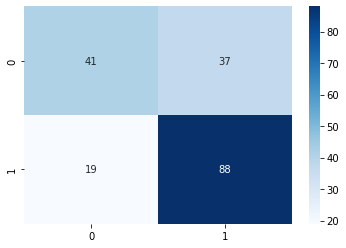

In [40]:
#Summarise the fit of the model
report = classification_report(y_test, y_pred, target_names=['Y','N'])
print("Report : \n{}".format(report))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')

# Saving Model

After training a scikit-learn model, it is desirable to have a way to persist the model for future use without having to retrain

In [41]:
#Save Model using pickle
import pickle
pickle.dump(testmodel, open("testmodel.pkl","wb"))

In [42]:
#load pickle model
model = pickle.load(open("testmodel.pkl","rb"))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 8])])),
                ('classifier', DecisionTreeClassifier())])

In [43]:
model.predict(x_test)

array(['N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y

In [44]:
#save Model with sklearn joblib
from joblib import load, dump
dump(testmodel,'loanmodeljob.joblib')

['loanmodeljob.joblib']

In [45]:
model1 = load('loanmodeljob.joblib')
model1.predict(x_test)

array(['N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y

In [46]:
type(x_test)

numpy.ndarray

In [47]:
sample = [['0','Graduate','No',5498,250.0,128.0,360,1,'Urban']]
sample

[['0', 'Graduate', 'No', 5498, 250.0, 128.0, 360, 1, 'Urban']]

In [48]:
sample1 = [['0', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0, 1.0, 'Rural']]
sample1

[['0', 'Graduate', 'No', 4583, 1508.0, 128.0, 360.0, 1.0, 'Rural']]

In [49]:
model1.predict(sample)

array(['Y'], dtype=object)

In [50]:
model1.predict(sample1)

array(['N'], dtype=object)